# Data cleaning and preprocessing


## Libraries AND CONFIGURATIONS



In [ ]:
# Import libraries

import re                               # Regular Expressions
import time                             # Time Function Execution
import datetime as dt                   # Datetime utilities
import pandas   as pd                   # Dataframe Manipulation
import numpy    as np                   # Matrix Manipulation
import seaborn  as sns                  # Visualization and Plotting

In [ ]:
from sklearn import preprocessing       # Normalization and Data Transformations
from sklearn import feature_selection   # Feature Selection
from sklearn import feature_extraction  # Feature Extraction
from sklearn import model_selection     # Train-testing Split
from sklearn import utils               # Verification and Safe operations

In [ ]:
import nltk                                          # Natural Language Toolkit
nltk.download('stopwords')                           # Query stopwords list
nltk.download('wordnet')                             # Query wordnet for POS
nltk.download('averaged_perceptron_tagger')          # Used in Lemmatization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
"""from pydrive.auth        import GoogleAuth           # Use Google Auth
from pydrive.drive       import GoogleDrive          # Mount Google's drive
from google.colab        import auth                 # Use Google Auth in Colab
from oauth2client.client import GoogleCredentials    # Api to load google credentials"""

"from pydrive.auth        import GoogleAuth           # Use Google Auth\nfrom pydrive.drive       import GoogleDrive          # Mount Google's drive\nfrom google.colab        import auth                 # Use Google Auth in Colab\nfrom oauth2client.client import GoogleCredentials    # Api to load google credentials"

In [ ]:
sns.set_theme()

## Load Data  
First load the csv into /content/ directory.  
Run the code above and agree to allow colab to get access to the folder /content/  


In [ ]:
# Create an api session with Google Drive
"""auth.authenticate_user()
gauth             = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive             = GoogleDrive(gauth)"""

'auth.authenticate_user()\ngauth             = GoogleAuth()\ngauth.credentials = GoogleCredentials.get_application_default()\ndrive             = GoogleDrive(gauth)'

Change the string in var filepath to set where the path resides.

In [ ]:
filepath = "/aspcliamsdb_r_sptkpi.xlsx"

Load Data:
- Set corresponding data type for each column.
- Use first row in csv as column's name.
- Leave rows with no data.

In [ ]:
# Load Dataset
start_time = time.time()  # Measure function time execution
# Set types to each column
dtypes     = {"cm_id":'category', "claim_id":'category',"pl":'category',"productmodel":'string',"partno":'string',"totalamount":'float32',"program_number":'category',"program_name":'string',"descr":'string',"actual_activity":'string',"reseller":'string',"claim_status":'category',"business_type":'category',"activity_subtype":'category',"activity_subtype_id":'category'}
# Load from excel
raw_df     = pd.read_excel(filepath, header=0, verbose=True, dtype=dtypes, thousands=",") 
# Load from CSV
end_time   = time.time()  # End time
print("The time of execution is :",(end_time-start_time) * 10**3, "ms")

Reading sheet 0


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
<ipython-input-120-2cc263ae4397>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  raw_df     = pd.read_excel(filepath, header=0, verbose=True, dtype=dtypes, thousands=",")
<ipython-input-120-2cc263ae4397>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  raw_df     = pd.read_excel(filepath, header=0, verbose=True, dtype=dtypes, thousands=",")


The time of execution is : 10532.884120941162 ms


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

### Set column type

In [ ]:
start_time = time.time()                                                            # Measure function time executio
raw_df["sdate"] = pd.to_datetime(raw_df["start_date"], errors="coerce", utc=True)   # Convert to Time Series. Return Date type
raw_df["edate"] = pd.to_datetime(raw_df["end_date"], errors="coerce", utc=True)     # Convert to Time Series. Return Date type
end_time   = time.time()  # End time
print("The time of execution is :",(end_time-start_time) * 10**3, "ms")

The time of execution is : 18.191099166870117 ms


## Data Description

In [ ]:
# Sort Columns by date
raw_df = raw_df.sort_values(by="sdate")

In [ ]:
raw_df

,cm_id,claim_id,start_date,end_date,pl,productmodel,partno,totalamount,program_number,program_name,descr,actual_activity,reseller,claim_status,business_type,activity_subtype,activity_subtype_id,sdate,edate
20494,48954,16074,2001-06-26 00:00:00,2021-08-31 00:00:00,5M- (7CC52AA),<NA>,<NA>,5000.000000,11493,ASP Meijer BTS '21 Endcap,MARKET DEVELOPMENT FUNDS,In-Store Merchandising Enhancement,New Age,Cancelled,HPS HW,BTS,BTS,2001-06-26 00:00:00+00:00,2021-08-31 00:00:00+00:00
23268,56033,22290,2011-11-05 00:00:00,2022-12-03 00:00:00,KV- (4XM40A),15-EH2085CL,61D22UA,407595.000000,AIS-CK-N00823,Costco.com C2'22 NB IR Program,undefined,Instant Savings,Costco,Approved,PC,Display,Display,2011-11-05 00:00:00+00:00,2022-12-03 00:00:00+00:00
23440,57380,22661,2011-11-05 00:00:00,2022-12-04 00:00:00,KV- (4XM40A),15-EH2085CL,61D22UA,25375.000000,AIS-CK-N00823,Costco.com C2'22 NB IR Program,undefined,Instant Savings,Costco,Approved,PC,Display,Display,2011-11-05 00:00:00+00:00,2022-12-04 00:00:00+00:00
13686,24808,8203,2016-09-10 00:00:00,2016-09-10 00:00:00,4H- (7CC47AA),OJ 5740,B9S76A,19800.000000,2896,Target OJ5740 Markdown,EOL Program,End of Life (Prior to 8/1/12 EOL booked to Y77E.),Target,Approved,HPS HW,UNKNOWN,UNKNOWN,2016-09-10 00:00:00+00:00,2016-09-10 00:00:00+00:00
17139,25523,8341,2017-11-24 00:00:00,2017-11-24 00:00:00,2N- (7CC42AA),Rockit 100 AiO,T8X39A,74880.601562,5697,HP Amp Price Elasticity Test,SPECIAL NEGOTIATED DISCOUNT,Stock return avoidance,Wal-Mart,Approved,HPS HW,UNKNOWN,UNKNOWN,2017-11-24 00:00:00+00:00,2017-11-24 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23032,64824,24842,NaN,NaN,5M- (7CC52AA),HP Envy 6055e,223N1A,960.000000,M104,NP-B2B2023-HPS,undefined,Instant Savings,New Age,Submitted,HPS HW,UNKNOWN,UNKNOWN,NaT,NaT
23038,64815,24842,NaN,NaN,2N- (7CC42AA),HP DeskJet 2755e,26K67A,260.000000,M104,NP-B2B2023-HPS,undefined,Instant Savings,New Age,Submitted,HPS HW,UNKNOWN,UNKNOWN,NaT,NaT
23041,64817,24842,NaN,NaN,2N- (7CC42AA),DJ 3755 AiO Blue,J9V90A,455.000000,M104,NP-B2B2023-HPS,undefined,Instant Savings,New Age,Submitted,HPS HW,UNKNOWN,UNKNOWN,NaT,NaT
23042,23069,7717,0208-12-21 00:00:00,2019-12-28 00:00:00,1D- (7CC37AA),HP LaserJet Pro MFP M29w Printer,Y5S53A,4760.000000,9293,ASP - LJ m29w In Store Offers for Hol '19,SPECIAL NEGOTIATED DISCOUNT,MIR,Staples,Approved,HPS HW,Holiday,Holiday,NaT,2019-12-28 00:00:00+00:00


In [ ]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=False, stopwords=None):
  lst_text = clean_text(text).split()                          # Text to list (Tokenization)
  if stopwords is True:
    stopwords  = nltk.corpus.stopwords.words("english")        # Use default stopwords (English) if one not provided
    text_clean = remove_stopwords(stopwords, lst_text)         # Apply stopwords to text
  elif stopwords is False:                             
    text_clean = lst_text                                      # Use No stopwords
  else:
    text_clean = remove_stopwords(lst_stopwords, lst_text)     # Use given stopwords if one is provided

  if flg_stemm == True:
    text_clean = stemtext(text_clean)                          # Apply Stemming if flag is on
  if flg_lemm == True:
    text_clean = lemtext(text_clean)                           # Apply Lemmatizing if flag is on
  text_out = " ".join(text_clean)                              # Concatenate text
  return text_out

## Support Functions
def clean_text(text):
  # Clean: Convert to lowercase. Remove punctuation and characters, then strip.
  if not pd.isna(text):
    text_ph0 = text.lower()                                      # Lowercase text
    text_ph1 = re.sub('https?://\S+|www\.\S+', '', text_ph0)     # Remove URLs
    text_ph2 = re.sub('<.*>+', '', text_ph1)                     # Remove content inside brackets
    text_ph3 = re.sub('\n', '', text_ph2)                        # Remove EOL character
    text_ph4 = re.sub(r'[^\w\s]', ' ', str(text_ph3).strip())    # Mod: Add replace with whitespace to handle End.Begin phrase
    text_clean = text_ph4
    return text_clean
  else:
      return "NAN"



def remove_stopwords(stopwords, lst_text):
  return [word for word in lst_text if word not in stopwords]


def stemtext(lst_text):
  ss = nltk.stem.snowball.SnowballStemmer("english", ignore_stopwords=True)     # Improve version of PorterStemming
  return [ss.stem(word) for word in lst_text]


def lemtext(lst_text):
  from nltk.stem   import WordNetLemmatizer
  lem          = WordNetLemmatizer()                           # Instance Lemmatizer
  tagged_words = nltk.pos_tag(lst_text)                        # Tuple with POS
  return [lem.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in tagged_words]

def get_wordnet_pos(treebank_tag):
  from nltk.corpus import wordnet
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    return wordnet.NOUN    # If POS is not recognized; Noun assumption.

In [ ]:
train = raw_df[['activity_subtype','program_name']].query("activity_subtype != 'UNKNOWN'")
test = raw_df[['activity_subtype','program_name']].query("activity_subtype == 'UNKNOWN'")

In [ ]:
# Comparative of different configurations for preprocessing
dfcopy                   = train
dfcopy["text_stem"]      = train["program_name"].apply(lambda x: utils_preprocess_text(x, flg_stemm=True, flg_lemm=False, stopwords=False))

## TF iDF




In [ ]:
vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2), decode_error='ignore')

In [ ]:
vectorizer.fit(df["text_clean"]) # Train TFiDF with the text clean
X              = vectorizer.transform(df["text_clean"])
dic_vocabulary = vectorizer.vocabulary_

NameError: ignored

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,df["y"],test_size=0.3, shuffle=True)
X_test, X_val, y_test, y_val     = model_selection.train_test_split(X_test,y_test,test_size=0.5, shuffle=True)

In [ ]:
vectorizer.stop_words_

In [ ]:
for i in dic_vocabulary:
  if dic_vocabulary[i] == 8311:
    print(i)

In [ ]:
vectorizer = feature_extraction.text.CountVectorizer()

In [ ]:
X = vectorizer.fit_transform(X_train)

In [ ]:
X

## Word tokenization


In [ ]:
import nltk
import re

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
tokenized = {}
tokenized["activity_subtype"] = dfcopy["activity_subtype"].values
tokenized["text_stem"] = [nltk.tokenize.word_tokenize(sentence) for sentence in dfcopy["text_stem"].values]

In [ ]:
tokenized_df = pd.DataFrame(tokenized)

## Word2Vec embedding


In [ ]:
# mapping and dropping nan values

map = {
"Program":        0,
"Display":        1,
"BTB":            2,
"Search":         3,
"Holiday":        4,
"BTS":            5,
"Email":          6,
"Digital":        7,
"Trad_media":     8
}

tokenized_df['activity_subtype']= tokenized_df['activity_subtype'].map(map)


tokenized_df = tokenized_df.dropna(subset=['activity_subtype'])
tokenized_df = tokenized_df.reset_index().drop(columns=["index"])
tokenized_df[1:30]

,activity_subtype,text_stem
1,1.0,"[costco, com, c2, 22, nb, ir, program]"
2,1.0,"[costco, com, c2, 22, nb, ir, program]"
3,0.0,"[q118, hps, toner, privat, offer, rebat]"
4,0.0,"[q118, op, ink, privat, offer, rebat]"
5,2.0,"[deskjet, 3752, btb, 18, price, protect]"
6,2.0,"[envi, 4512, btb, 18, price, protect]"
7,0.0,"[q118, opston, privat, offer, rebat]"
8,0.0,"[q118, op, ink, privat, offer, rebat]"
9,0.0,"[q118, op, ink, privat, offer, rebat]"
10,0.0,"[q218, op, ink, privat, offer, rebat]"


In [ ]:
#model_params

#word2vec
vector_size = 100
window = 3
min_count = 2
use_sg = 0

#random forest
max_depth = 3

In [ ]:
# data set split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (tokenized_df['text_stem'], tokenized_df['activity_subtype'] , test_size=0.2)

In [ ]:
#word2vec model

import gensim

w2v_model = gensim.models.Word2Vec(X_train,
                                   vector_size=vector_size,
                                   window=window,
                                   min_count=min_count,
                                   sg=use_sg)

NameError: ignored

# Data classification


In [ ]:
# data set adjustments for classifier

words = set(w2v_model.wv.index_to_key )
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_train])
X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_test])

# averaging words into sentence

X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(vector_size, dtype=float))
        
X_test_vect_avg = []

for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(vector_size, dtype=float))

<ipython-input-141-6d0e9d2dbd91>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_train])
<ipython-input-141-6d0e9d2dbd91>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in X_test])


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
def models_eval(classifiers, Xtrain, Xtest, ytrain, ytest):
  results = {}
  for classifier in classifiers:
    if classifier in ["k-means"]:
      ypred = classifiers[classifier].fit(Xtrain).predict(Xtest)
    else:
      ypred = classifiers[classifier].fit(Xtrain, ytrain).predict(Xtest)
    results[classifier] = {
        "predictions" : ypred,
        "accuracy" : accuracy_score(ytest, ypred)
                           }
  return results

In [ ]:
classifiers = {
    "Random Forest" : RandomForestClassifier(max_depth=max_depth, random_state=0),
    "Decision Tree" : DecisionTreeClassifier(),
    "K-nearest Neighbor" : KNeighborsClassifier(n_neighbors = 10),
    "Support Vector" : SVC(kernel='linear'),
    "K-means" : KMeans(n_clusters=len(np.unique(y_train)))
}

results = models_eval(classifiers, X_train_vect_avg, X_test_vect_avg, y_train, y_test)

for i in results:
  print(i, "accuracy", results[i]["accuracy"])

NameError: ignored

## CROSS VALIDATION APPROACH

In [ ]:

  def models_eval(classifiers, X, y, k_folds):
    results = {}
    for classifier in classifiers:
      if classifier in ["k-means"]:
        pass
      else:
        results[classifier] = cross_val_score(classifiers[classifier], X, y, cv=k_folds)
    return results

In [ ]:
y = tokenized_df['activity_subtype']

# data set adjustments for classifier

X = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in tokenized_df['text_stem']])

# averaging words into sentence

X_vect_avg = []

for v in X:
    if v.size:
        X_vect_avg.append(v.mean(axis=0))
    else:
        X_vect_avg.append(np.zeros(vector_size, dtype=float))

<ipython-input-145-3a4a0246c688>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array([np.array([w2v_model.wv[i] for i in ls if i in words]) for ls in tokenized_df['text_stem']])


In [ ]:
classifiers = {
    "Random Forest" : RandomForestClassifier(max_depth=max_depth, random_state=0),
    "Decision Tree" : DecisionTreeClassifier(),
    "K-nearest Neighbor" : KNeighborsClassifier(n_neighbors = 10),
    "Support Vector" : SVC(kernel='linear'),
    "K-means" : KMeans(n_clusters=len(np.unique(y_train)))
}

classifiers = {
    "K-nearest Neighbor" : KNeighborsClassifier(n_neighbors = 5,p=3),
}


results = models_eval(classifiers, X_vect_avg, y, 8)

for i in results:
  print(i, "accuracy", results[i])

KeyboardInterrupt: ignored

In [ ]:
for i in results:
  print(i, np.average(results[i]))

K-nearest Neighbor1 0.9011814345991562
K-nearest Neighbor2 0.9020253164556962
K-nearest Neighbor3 0.9037130801687763
K-nearest Neighbor4 0.90168776371308


## K-means 


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_in

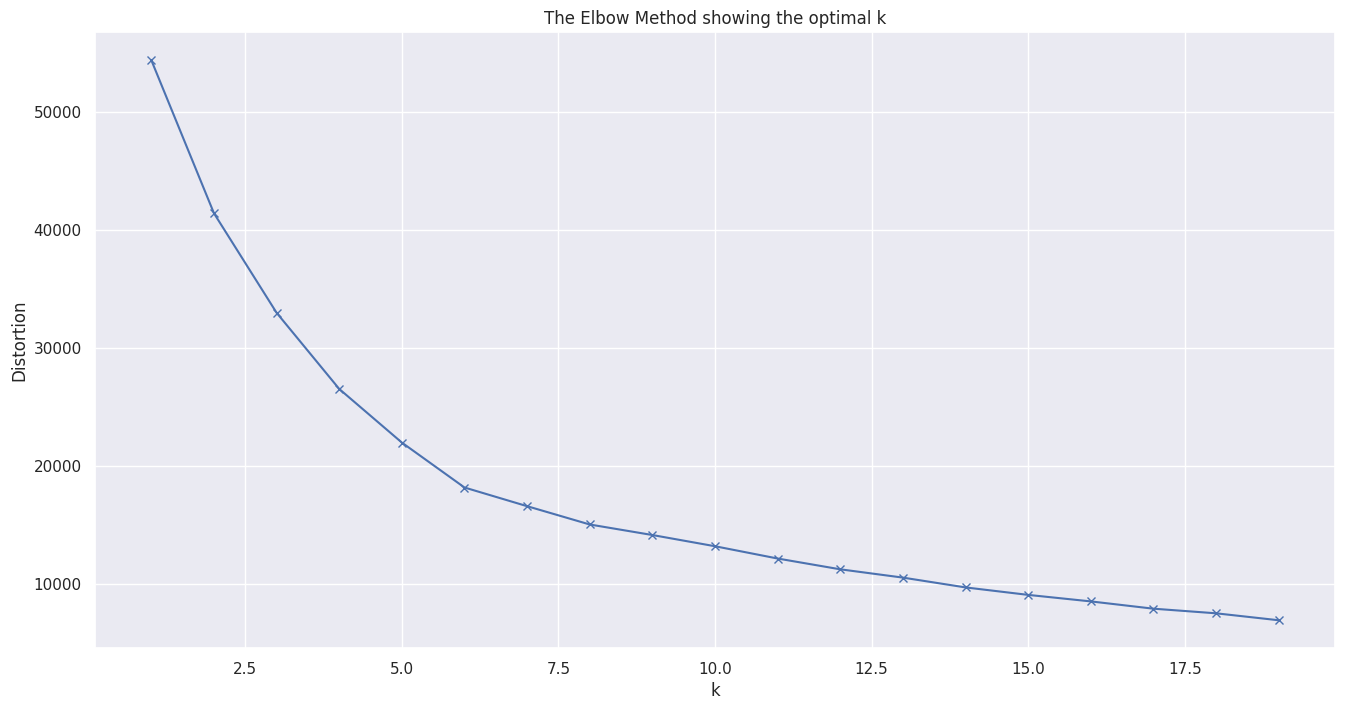

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline 

distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k, algorithm="elkan").fit(X_vect_avg)
    distortions.append(kmeanModel.inertia_)


plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



In [ ]:
kmeanModel = KMeans(n_clusters=9, algorithm="elkan").fit(X_vect_avg)
kmeanModel.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([7, 4, 4, ..., 2, 2, 7], dtype=int32)

In [ ]:
len(kmeanModel.labels_)
len(y)

dic = {
0:        [],
1:        [],
2:        [],
3:        [],
4:        [],
5:        [],
6:        [],
7:        [],
8:        []
}

for i in range(len(y)):
  (dic[y[i]]).append(kmeanModel.labels_[i])

In [ ]:
for i in dic:
  freq = np.bincount(dic[i])
  np.argmax(freq)
  print(i, freq, np.argmax(freq))

0 [ 528  533 1175  747  352  525  243 2168   29] 7
1 [110   2  78   0 330 221 400 477] 7
2 [ 96   0   0  44   0   0   0  64 802] 8
3 [  3   8 694   0   0  11  28 128] 2
4 [253 185   0   1  81   3   7 228  11] 0
5 [ 43   3   0   0 448  13  40 133   8] 4
6 [  0   0   0   0   0 240   0  64] 5
7 [  3   0   0   0   0   8   0 145] 7
8 [  0   0   2   0   0   5   0 130] 7
